In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scvelo as scv
import scanpy
import smurf
from scoit import sc_multi_omics

import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn

dyn.get_all_dependencies_version()

ModuleNotFoundError: No module named 'scot.multi_omics_model'

In [3]:
# adata = dyn.read_loom('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus.loom')
adata = dyn.read_h5ad('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(type(adata.obs['clusters']))
print(adata)

# data = pd.read_hdf('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
# print(data)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [6]:
s = adata.to_df(layer='spliced')
u = adata.to_df(layer='unspliced')
data = adata.X
data = pd.DataFrame.sparse.from_spmatrix(data)

In [12]:
input = np.array([data,s,u])
print(input)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [11]:
print(input.count)

<built-in method count of list object at 0x7fe048056180>


In [2]:


sc_model = sc_multi_omics()
predict_data = sc_model.fit(input) # the imputed data

imputed_expression_data = predict_data[0]
imputed_methylation_data = predict_data[1]

ModuleNotFoundError: No module named 'scot'

In [6]:
print(adata)

View of AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    var: 'n_cells'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [7]:
import scipy
# spliced = scanpy.AnnData(s)
spliced = scipy.sparse.csr_matrix(s_data_imputed.values)
unspliced = scipy.sparse.csr_matrix(u_data_imputed.values)

# print(spliced)

# print(adata.layers['spliced'])

# adata.to_df(layer='X_spliced').loc[:,(s!=0).any(axis=0)]
# print(type(adata.layers['X_spliced']))
# rows, cols = adata.layers['X_spliced'].nonzero()
# print(rows,cols)
adata.layers['spliced'] = spliced
adata.layers['unspliced'] = unspliced
# print(spliced)
# spliced
# print(adata.to_df(layer='X_spliced'))

# print(adata.layers['unspliced'])

In [8]:
dyn.pp.recipe_monocle(adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

In [9]:
print(adata.layers['X_spliced'].shape)

(2930, 8599)


In [10]:
dyn.tl.dynamics(adata,model='stochastic')

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [22.3329s]


estimating gamma: 100%|██████████| 2000/2000 [00:57<00:00, 34.97it/s]


AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'n_cells', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moment

In [11]:
dyn.tl.reduceDimension(adata)

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.2603s]


In [12]:
# dyn.tl.cell_velocities(adata)
dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'}, enforce=True, basis='umap')

|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [1.2806s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.8573s]


AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'n_cells', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspli

In [13]:
# dyn.vf.VectorField(adata,basis = 'umap')
dyn.tl.cell_wise_confidence(adata)

AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'n_cells', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'uns

|-----------> plotting with basis key=X_umap
|-----------> skip filtering clusters by stack threshold when stacking color because it is not a numeric type


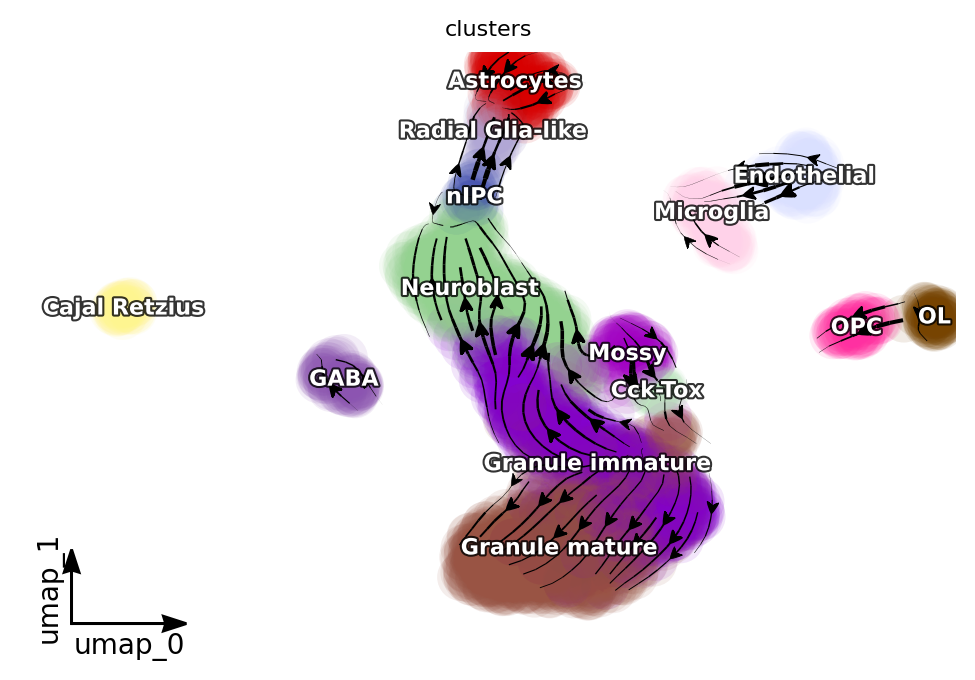

In [14]:
# fig1, f1_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 4))
# f1_axes[0] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[0], show_legend='right', save_show_or_return='return')
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True)
# f1_axes[0].set_title('splicing')
# f1_axes[1] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[1], show_legend='right', save_show_or_return='return')
# f1_axes[1].set_title('labeling')
plt.show()

In [15]:
adata

AnnData object with n_obs × n_vars = 2930 × 8599
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'n_cells', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'uns

In [16]:
print(adata.obs['jaccard_velocity_confidence'])

index
AAACATACCCATGA    0.142589
AAACATACCGTAGT    0.540000
AAACATACGAGAGC    0.176734
AAACATACTGAGGG    0.112583
AAACATTGGCATCA    0.134426
                    ...   
TTTCTACTTCCCGT    0.190661
TTTGACTGCCTGTC    0.201794
TTTGACTGTCTGGA    0.164452
TTTGCATGGGAGTG    0.820513
TTTGCATGTTCTTG    0.175043
Name: jaccard_velocity_confidence, Length: 2930, dtype: float64


In [17]:
# adata.obsm[[key for key in adata.obsm if key.startswith('velocity_S')][0]]
# v_emb = adata.obsm['{}_umap'.format('velocity_S')]

In [18]:
import eval_util
from imp import reload
reload(eval_util)

cluster_edges = [("OPC", "OL")]
eval_util.evaluate(adata, cluster_edges, 'clusters', "velocity_S", x_emb="X_umap")

# Cross-Boundary Transition Score (A->B)
{('OPC', 'OL'): -0.051074931781850644}
Total Mean: -0.051074931781850644
# Cross-Boundary Velocity Coherence (A->B)
{('OPC', 'OL'): 0.9842873577416387}
Total Mean: 0.9842873577416387
# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): -0.9057779599763522}
Total Mean: -0.9057779599763522
# In-cluster Coherence
{'Astrocytes': 0.9998331326428833, 'Cajal Retzius': 0.9999901755497137, 'Cck-Tox': 0.9999658229939805, 'Endothelial': 0.9958813079416267, 'GABA': 0.9994060904450577, 'Granule immature': 0.9998869006588113, 'Granule mature': 0.9999102555992638, 'Microglia': 0.9990772756839935, 'Mossy': 0.9992593833396031, 'Neuroblast': 0.9998118863182943, 'OL': 0.9966763423229433, 'OPC': 0.9998533463619358, 'Radial Glia-like': 0.9996722086708145, 'nIPC': 0.9991970671863681}
Total Mean: 0.9991729425510921
# In-cluster Confidence
{'Astrocytes': 0.5190179974323141, 'Cajal Retzius': 0.9326388888888888, 'Cck-Tox': 0.195869176367176, 'Endothelial': 0.675

{'Cross-Boundary Transition Score (A->B)': {('OPC',
   'OL'): [-0.08546413047502828, -0.005546385036731013, -0.036988410101610435, -0.014506580099720324, -0.07759842874061688, -0.043063157170963685, -0.08956186472868459, -0.0558704979014499]},
 'Cross-Boundary Velocity Coherence (A->B)': {('OPC',
   'OL'): [0.9912953691038944, 0.9912903790821223, 0.9911683870725718, 0.9654008489204164, 0.9908131032097095, 0.990230427246325, 0.990751479280469, 0.963348868017601]},
 'Cross-Boundary Direction Correctness (A->B)': {('OPC',
   'OL'): [-0.987504517040399, -0.644236258775913, -0.9677444700924919, -0.9918285360555892, -0.9426351306155607, -0.7344337425840121, -0.9808490257332027, -0.9969919989136492]},
 'In-cluster Coherence': {'Astrocytes': [0.9998715617079077,
   0.9999269912587708,
   0.9998822156166439,
   0.9998419587452745,
   0.9998469146974123,
   0.9998839279189533,
   0.9997977589766974,
   0.9999026924752709,
   0.9998704224506625,
   0.9997938779210725,
   0.9998858890452869,
   0.

In [19]:
# Abundance of ['spliced', 'unspliced']: [0.9 0.1]
# Cross-Boundary Transition Score (A->B) {('OPC', 'OL'): 0.00630295} 
# Total Mean: 0.006302949972450733
# # Cross-Boundary Velocity Coherence (A->B) {('OPC', 'OL'): 0.3934500415874338}
#  Total Mean: 0.3934500415874338 
# Cross-Boundary Direction Correctness (A->B) {('OPC', 'OL'): -0.4227274062633888} 
# Total Mean: -0.4227274062633888 
# In-cluster Coherence {'Astrocytes': 0.7609318681810356, 'Cajal Retzius': 0.9378692715572066, 'Cck-Tox': 0.828734583852736, 'Endothelial': 0.9314706331659218, 'GABA': 0.882795543614253, 'Granule immature': 0.7868408703982197, 'Granule mature': 0.7489468911509204, 'Microglia': 0.7524512450389534, 'Mossy': 0.8492471138928402, 'Neuroblast': 0.7524816364622642, 'OL': 0.9347272229079507, 'OPC': 0.9451652802702815, 'Radial Glia-like': 0.9283747568913194, 'nIPC': 0.9197938162835281} 
# Total Mean: 0.8542736238333878 
# # In-cluster Confidence {'Astrocytes': 0.7537898279256907, 'Cajal Retzius': 0.9332962276885705, 'Cck-Tox': 0.7505103008792292, 'Endothelial': 0.9221172614286053, 'GABA': 0.8864795512978749, 'Granule immature': 0.7682340803641703, 'Granule mature': 0.7337182506902056, 'Microglia': 0.7429558783303785, 'Mossy': 0.8291995007567275, 'Neuroblast': 0.7423294623889758, 'OL': 0.9311022403250092, 'OPC': 0.9390802734135254, 'Radial Glia-like': 0.8904570023880877, 'nIPC': 0.8826370031044427} 
# Total Mean: 0.8361362043558208
print('')
